# Simple Linear Regression

## Load in Libraries

In [ ]:
  # Basic working with data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-learn machine learning imports
from sklearn.tree import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

## Exercise 1. Breast Cancer Data

This is the same one we used for logistic regression. [A description of the variables can be found here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)).

As before, the documentation is terrible. There is an important face missing: the `malignant` column is a "2" when benign, and a "4" when malignant. You'll have to convert this to a boolean yourself.

Let's use the dataset to predict whether a tumor is malignant or benign. Two important questions, related to comparing it to logistic regression:

1. How does it compare in terms of accuracy?
2. How does it compare in terms of explainability?

In [ ]:
cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                  na_values="?", header=0)
cancer.columns = ["ID", "radius", "texture", "peri", "area", "smooth", "concav", "conc.pts", "symm", "fractal", "malignant"]

In [ ]:
cancer["malignant"] = cancer["malignant"].replace(2,"benign")
cancer["malignant"] = cancer["malignant"].replace(4,"malignant")
cancer.head()

,ID,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal,malignant
0,1002945,5,4,4,5,7,10.0,3,2,1,benign
1,1015425,3,1,1,1,2,2.0,3,1,1,benign
2,1016277,6,8,8,1,3,4.0,3,7,1,benign
3,1017023,4,1,1,3,2,1.0,3,1,1,benign
4,1017122,8,10,10,8,7,10.0,9,7,1,malignant


In [ ]:
cancer = cancer.dropna()

In [ ]:
cancer.head()

,ID,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal,malignant
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [ ]:
y = cancer["malignant"]
X = cancer[["radius", "texture", "peri", "area", "smooth", "concav", "conc.pts", "symm", "fractal"]]
X = pd.get_dummies(X).astype("float32")
X.head(3)

,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal
0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
1,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)

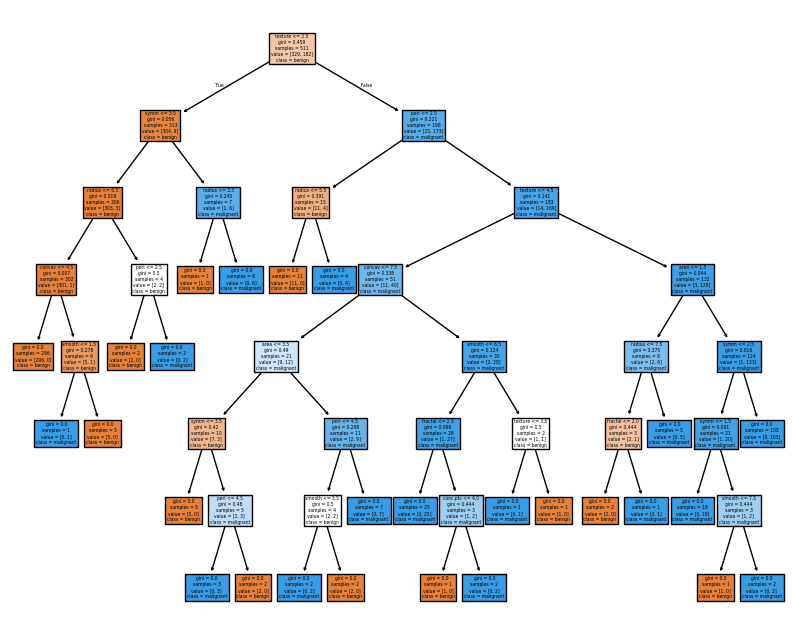

In [ ]:
fig = plt.figure(figsize=(10,8))
plot_tree(model,
          class_names = y.sort_values().unique(),
          feature_names=X.columns,
          filled=True, impurity=True);

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 1.00
Test Accuracy:  0.94
Null Accuracy:  0.67


This model gets to 94% accuracy on the test data, but its definitely overfit

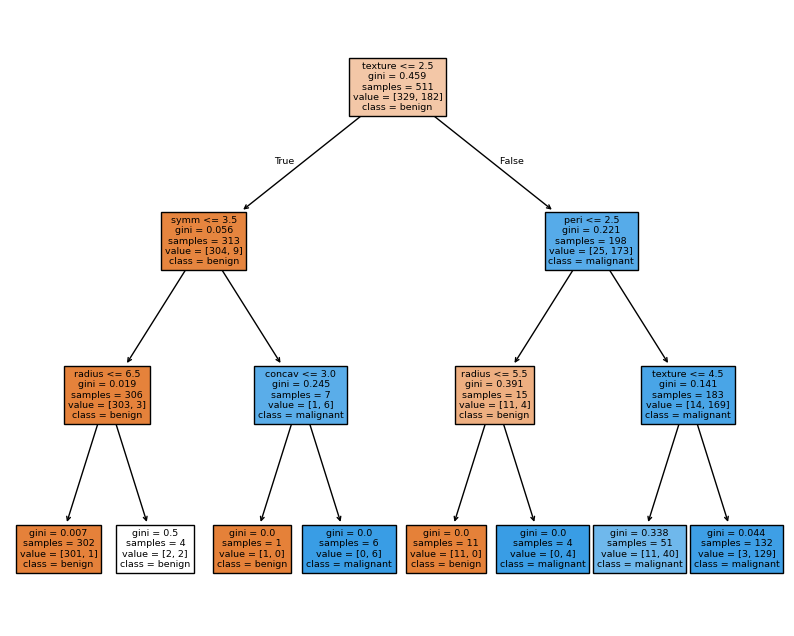

In [ ]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
fig = plt.figure(figsize=(10,8))
plot_tree(model,
          class_names = y.sort_values().unique(),
          feature_names=X.columns,
          filled=True, impurity=True);

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 0.97
Test Accuracy:  0.94
Null Accuracy:  0.67


Now it isn't as overfit and it still hits the 94% accuracy mark, which beats the null accuracy of 67%

To later compare to logistic regression, we see currently texture as the biggest predictor, followed by symmetry and perimeter

##Logistic reg

In [ ]:
y = (cancer["malignant"] == "malignant").astype("float32")
X = cancer[["radius", "texture", "peri", "area", "smooth", "concav", "conc.pts", "symm", "fractal"]]
X = pd.get_dummies(X).astype("float32")
X.head(3)

,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal
0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
1,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0


In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.Logit(y, X).fit()#To change it all you write is .Logit instead of .OLS

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.075407
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              malignant   No. Observations:                  682
Model:                          Logit   Df Residuals:                      672
Method:                           MLE   Df Model:                            9
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.8836
Time:                        15:20:13   Log-Likelihood:                -51.428
converged:                       True   LL-Null:                       -441.74
Covariance Type:            nonrobust   LLR p-value:                3.134e-162
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0982      1.174     -8.598      0.000     -12.400      -7.796
radius         0.5351      0

Logistic regression shows texture as not even being statistically significant, with radius being the biggest predictor followed by concavity points and concavity

## Exercise 2. WHO Life Expectancy Data

This is a repeat of the linear regression exercise to predict life expectancy. It's [at this URL](https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv), and the data was on [this page on kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), but presumably originally from [the WHO website](https://www.who.int/).

Since the decision tree isn't linear, there's no reason to take a log of the GDP or anything like that. As with Exercise 1, compare it in terms of accuracy and explainability to the linear regression model.

* Model 1: Predict Life Expectancy
* Model 2: Predict Developing/Developed status

In [ ]:
who = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv")
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
who = who.dropna()
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

##Linear Regression

In [ ]:
X = who[['Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']]
y = who["Life expectancy "]

In [ ]:
X = pd.get_dummies(X, drop_first=False).astype("float32") #drop_first drops the first column of extremely correlated x variable columns (if we know which cars are 2 wheel, we also know which are 4 wheel


In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     457.4
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:38:53   Log-Likelihood:                -4440.6
No. Observations:                1649   AIC:                             8919.
Df Residuals:                    1630   BIC:                             9022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

I feel like grouping by country would make this data matter a whole lot more since life expectancy varies by country a lot.

#Tree life expectancy

In [ ]:
X.dtypes #Checking that theyre all float32

,0
const,float64
Adult Mortality,float32
infant deaths,float32
Alcohol,float32
percentage expenditure,float32
Hepatitis B,float32
Measles,float32
BMI,float32
under-five deaths,float32
Polio,float32


In [ ]:
y = y.reset_index()
#making y into an object variable so it can be predicted
y = y.astype("object")

dtype('O')

In [ ]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
fig = plt.figure(figsize=(20,16))
plot_tree(model,
          class_names = y.sort_values().unique(),
          feature_names=X.columns,
          filled=True, impurity=True);

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

<Figure size 2000x1600 with 0 Axes>

In [ ]:
#Have to make this a categorical variable
y.median()

y["cat"] = y[y["Life expectancy "] >=71.7]
y

TypeError: Cannot convert [65.0 59.9 59.9 ... 45.3 46.0
 16      77.8
 17      77.5
 18      77.2
 19      76.9
 20      76.6
         ...
 2825    75.1
 2843    71.7
 2848    78.0
 2849    75.0
 2850    73.0
 Name: Life expectancy , Length: 828, dtype: float64] to numeric

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:

fig = plt.figure(figsize=(10,8))
plot_tree(model,
          class_names = y.sort_values().unique(),
          feature_names=X.columns,
          filled=True, impurity=True);

If the model's not great, try changing the maximum depth of the tree.

## Exercise 3. Redlining

For completeness, we should also look at a classification problem which has more than two outcomes. So, let's ask the question: based on current demographics, can we determine what grade a neighborhood was given back in the 1930s?

As before, [here is the URL](https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv) for the dataset.

In [ ]:
redlining = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv")

redlining.head()

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Akron, OH",A,24702,8624,956,688,1993,36963,66.83,23.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,61.24,24.33,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,64.87,20.27,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
3,"Akron, OH",D,6179,6921,567,455,1022,15144,40.80,45.70,...,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,72.91,7.80,...,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00


In [ ]:
redlining.columns

Index(['metro_area', 'holc_grade', 'white_pop', 'black_pop', 'hisp_pop',
       'asian_pop', 'other_pop', 'total_pop', 'pct_white', 'pct_black',
       'pct_hisp', 'pct_asian', 'pct_other', 'lq_white', 'lq_black', 'lq_hisp',
       'lq_asian', 'lq_other', 'surr_area_white_pop', 'surr_area_black_pop',
       'surr_area_hisp_pop', 'surr_area_asian_pop', 'surr_area_other_pop',
       'surr_area_pct_white', 'surr_area_pct_black', 'surr_area_pct_hisp',
       'surr_area_pct_asian', 'surr_area_pct_other'],
      dtype='object')

In [ ]:
redlining = redlining.dropna()

X = redlining[['white_pop', 'black_pop', 'hisp_pop',
       'asian_pop', 'other_pop', 'total_pop', 'pct_white', 'pct_black',
       'pct_hisp', 'pct_asian', 'pct_other', 'lq_white', 'lq_black', 'lq_hisp',
       'lq_asian', 'lq_other', 'surr_area_white_pop', 'surr_area_black_pop',
       'surr_area_hisp_pop', 'surr_area_asian_pop', 'surr_area_other_pop',
       'surr_area_pct_white', 'surr_area_pct_black', 'surr_area_pct_hisp',
       'surr_area_pct_asian', 'surr_area_pct_other']]

y = redlining["holc_grade"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

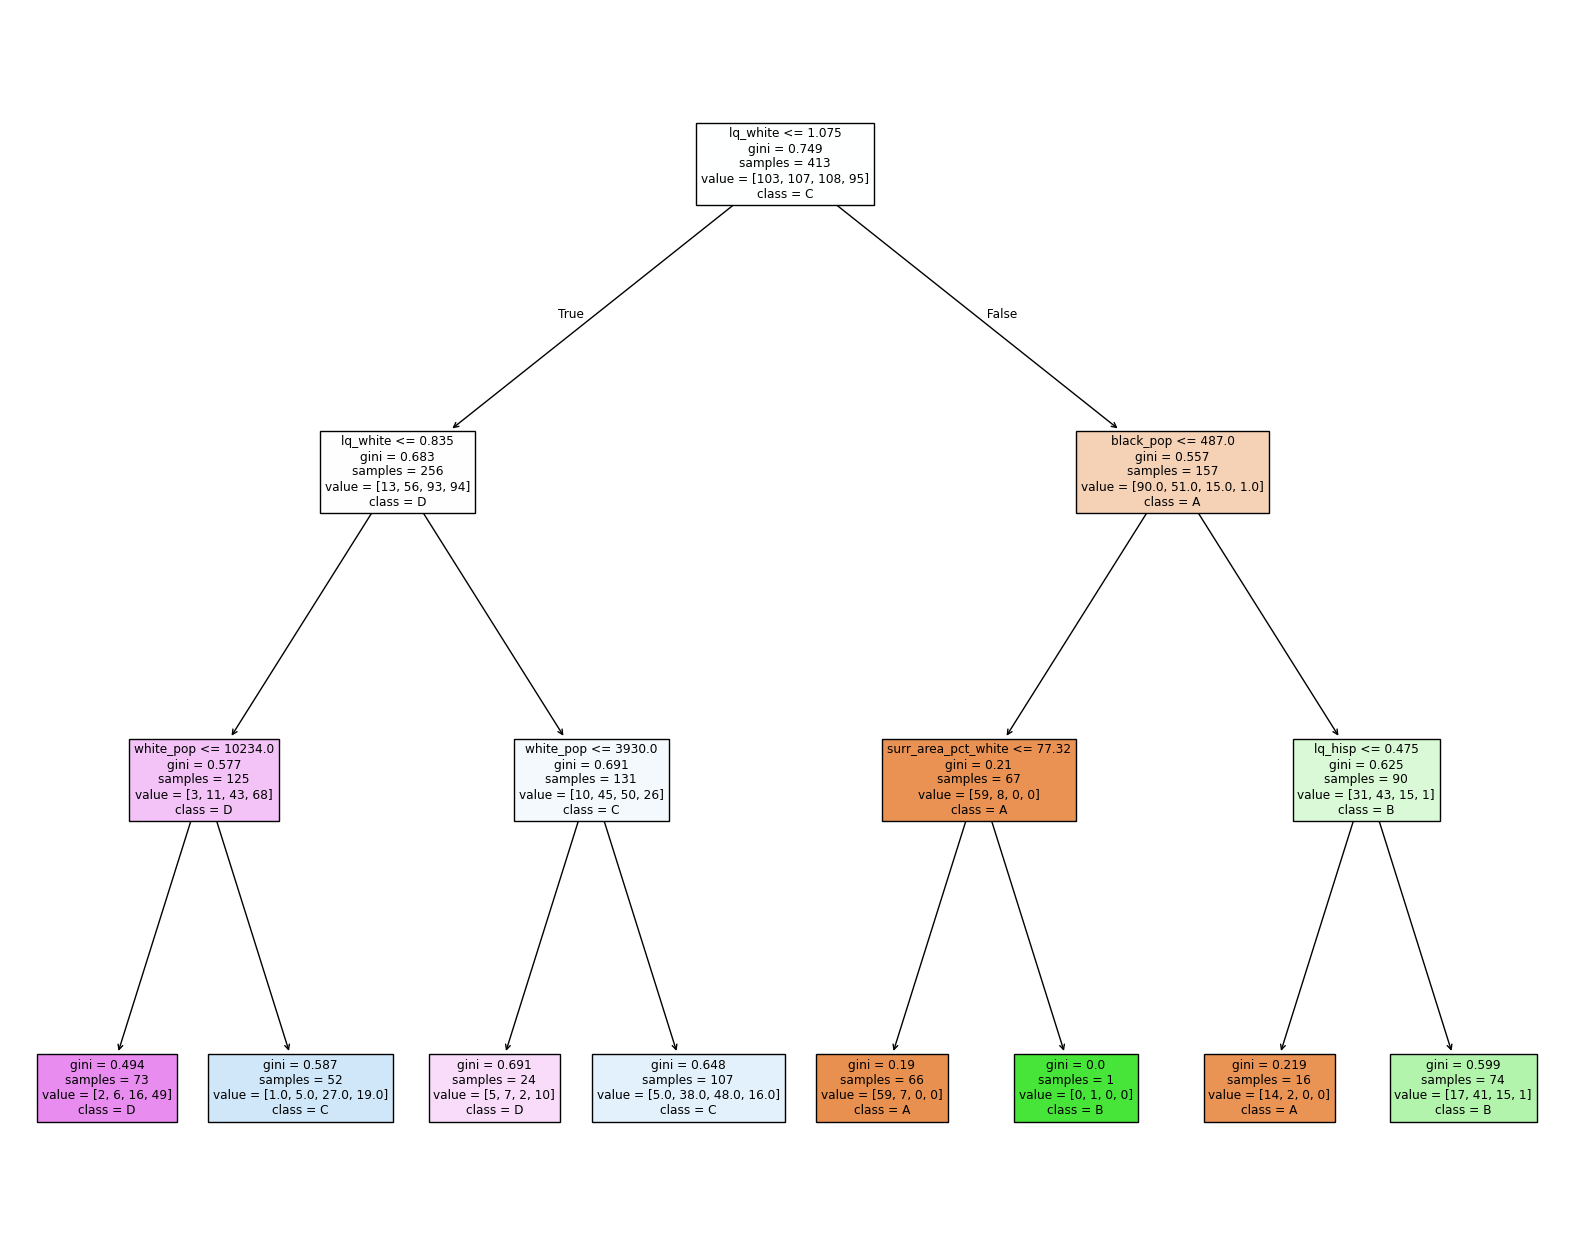

In [ ]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
fig = plt.figure(figsize=(20,16))
plot_tree(model,
          class_names = y.sort_values().unique(),
          feature_names=X.columns,
          filled=True, impurity=True);

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 0.60
Test Accuracy:  0.54
Null Accuracy:  0.31
